In [5]:
%matplotlib inline


# Nested pie charts

The following examples show two ways to build a nested pie chart
in Matplotlib. Such charts are often referred to as donut charts.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

The most straightforward way to build a pie chart is to use the
`~matplotlib.axes.Axes.pie` method.

In this case, pie takes values corresponding to counts in a group.
We'll first generate some fake data, corresponding to three groups.
In the inner circle, we'll treat each number as belonging to its
own group. In the outer circle, we'll plot them as members of their
original 3 groups.

The effect of the donut shape is achieved by setting a ``width`` to
the pie's wedges through the *wedgeprops* argument.



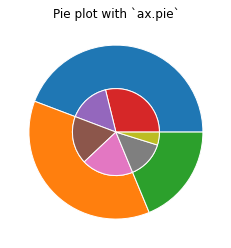

In [43]:
fig, ax = plt.subplots()

size = 0.5
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])

# cmap = plt.colormaps["tab20c"]
# outer_colors = cmap(np.arange(3)*4)
# inner_colors = cmap([1, 2, 5, 6, 9, 10])

# ax.pie(vals.sum(axis=1), radius=1, colors=outer_colors,
#        wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.sum(axis=1), radius=1,
       wedgeprops=dict(width=size, edgecolor='w'))

# ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#        wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals.flatten(), radius=1-size,
       wedgeprops=dict(width=size, edgecolor='w'))


ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.show()

In [41]:
vals,vals.sum(axis=1)

(array([[60., 32.],
        [37., 40.],
        [29., 10.]]),
 array([92., 77., 39.]))

In [42]:
dict(width=size, edgecolor='w')

{'width': 0.3, 'edgecolor': 'w'}

In [33]:
np.arange(3)*4

array([0, 4, 8])

However, you can accomplish the same output by using a bar plot on
axes with a polar coordinate system. This may give more flexibility on
the exact design of the plot.

In this case, we need to map x-values of the bar chart onto radians of
a circle. The cumulative sum of the values are used as the edges
of the bars.



In [ ]:
fig, ax = plt.subplots(subplot_kw=dict(projection="polar"))

size = 0.3
vals = np.array([[60., 32.], [37., 40.], [29., 10.]])
# Normalize vals to 2 pi
valsnorm = vals/np.sum(vals)*2*np.pi
# Obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.bar(x=valsleft[:, 0],
       width=valsnorm.sum(axis=1), bottom=1-size, height=size,
       color=outer_colors, edgecolor='w', linewidth=1, align="edge")

ax.bar(x=valsleft.flatten(),
       width=valsnorm.flatten(), bottom=1-2*size, height=size,
       color=inner_colors, edgecolor='w', linewidth=1, align="edge")

ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
plt.show()

.. admonition:: References

   The use of the following functions, methods, classes and modules is shown
   in this example:

   - `matplotlib.axes.Axes.pie` / `matplotlib.pyplot.pie`
   - `matplotlib.axes.Axes.bar` / `matplotlib.pyplot.bar`
   - `matplotlib.projections.polar`
   - ``Axes.set`` (`matplotlib.artist.Artist.set`)
   - `matplotlib.axes.Axes.set_axis_off`



In [39]:
mpl.rcParams.update({'font.size': 14})

# Indices to step through colormap.
x = np.linspace(0.0, 1.0, 100)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    fig, axs = plt.subplots(nrows=len(cmap_list), ncols=2)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99,
                        wspace=0.05)
    fig.suptitle(cmap_category + ' colormaps', fontsize=14, y=1.0, x=0.6)

    for ax, name in zip(axs, cmap_list):

        # Get RGB values for colormap.
        rgb = cm.get_cmap(plt.get_cmap(name))(x)[np.newaxis, :, :3]

        # Get colormap in CAM02-UCS colorspace. We want the lightness.
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        L = lab[0, :, 0]
        L = np.float32(np.vstack((L, L, L)))

        ax[0].imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        ax[1].imshow(L, aspect='auto', cmap='binary_r', vmin=0., vmax=100.)
        pos = list(ax[0].get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs.flat:
        ax.set_axis_off()

    plt.show()


for cmap_category, cmap_list in cmaps.items():

    plot_color_gradients(cmap_category, cmap_list)

NameError: name 'mpl' is not defined